In [1]:
from math import log

def creatDataSet():
    # 数据集
    dataSet=[[0, 0, 0, 0, 'no'],
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    #分类属性
    labels=['年龄','有工作','有自己的房子','信贷情况']
    #返回数据集和分类属性
    return dataSet,labels

def calcShannonEnt(dataSet):
    #返回数据集行数
    numEntries=len(dataSet)
    #保存每个标签（label）出现次数的字典
    labelCounts={}
    #对每组特征向量进行统计
    for featVec in dataSet:
        currentLabel=featVec[-1]                     #提取标签信息
        if currentLabel not in labelCounts.keys():   #如果标签没有放入统计次数的字典，添加进去
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1                 #label计数

    shannonEnt=0.0                                   #经验熵
    #计算经验熵
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries      #选择该标签的概率
        shannonEnt-=prob*log(prob,2)                 #利用公式计算
    return shannonEnt                                #返回经验熵

#main函数
if __name__=='__main__':
    dataSet,features=creatDataSet()
    print(dataSet)
    print(calcShannonEnt(dataSet))


[[0, 0, 0, 0, 'no'], [0, 0, 0, 1, 'no'], [0, 1, 0, 1, 'yes'], [0, 1, 1, 0, 'yes'], [0, 0, 0, 0, 'no'], [1, 0, 0, 0, 'no'], [1, 0, 0, 1, 'no'], [1, 1, 1, 1, 'yes'], [1, 0, 1, 2, 'yes'], [1, 0, 1, 2, 'yes'], [2, 0, 1, 2, 'yes'], [2, 0, 1, 1, 'yes'], [2, 1, 0, 1, 'yes'], [2, 1, 0, 2, 'yes'], [2, 0, 0, 0, 'no']]
0.9709505944546686


In [2]:
def chooseBestFeatureToSplit(dataSet):
    #特征数量
    numFeatures = len(dataSet[0]) - 1
    #计数数据集的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #信息增益
    bestInfoGain = 0.0
    #最优特征的索引值
    bestFeature = -1
    #遍历所有特征
    for i in range(numFeatures):
        # 获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        #创建set集合{}，元素不可重复
        uniqueVals = set(featList)
        #经验条件熵
        newEntropy = 0.0
        #计算信息增益
        for value in uniqueVals:
            #subDataSet划分后的子集
            subDataSet = splitDataSet(dataSet, i, value)
            #计算子集的概率
            prob = len(subDataSet) / float(len(dataSet))
            #根据公式计算经验条件熵
            newEntropy += prob * calcShannonEnt((subDataSet))
        #信息增益
        infoGain = baseEntropy - newEntropy
        #打印每个特征的信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        #计算信息增益
        if (infoGain > bestInfoGain):
            #更新信息增益，找到最大的信息增益
            bestInfoGain = infoGain
            #记录信息增益最大的特征的索引值
            bestFeature = i
            #返回信息增益最大特征的索引值
    return bestFeature

def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


#main函数
if __name__=='__main__':
    dataSet,features=creatDataSet()
    # print(dataSet)
    # print(calcShannonEnt(dataSet))
    print("最优索引值："+str(chooseBestFeatureToSplit(dataSet)))



第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最优索引值：2


In [3]:
def majorityCnt(classList):
    classCount={}
    #统计classList中每个元素出现的次数
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
            classCount[vote]+=1
        #根据字典的值降序排列
        sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
        return sortedClassCount[0][0]

def createTree(dataSet,labels,featLabels):
    #取分类标签（是否放贷：yes or no）
    classList=[example[-1] for example in dataSet]
    #如果类别完全相同，则停止继续划分
    if classList.count(classList[0])==len(classList):
        return classList[0]
    #遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    #选择最优特征
    bestFeat=chooseBestFeatureToSplit(dataSet)
    #最优特征的标签
    bestFeatLabel=labels[bestFeat]
    featLabels.append(bestFeatLabel)
    #根据最优特征的标签生成树
    myTree={bestFeatLabel:{}}
    #删除已经使用的特征标签
    del(labels[bestFeat])
    #得到训练集中所有最优特征的属性值
    featValues=[example[bestFeat] for example in dataSet]
    #去掉重复的属性值
    uniqueVls=set(featValues)
    #遍历特征，创建决策树
    for value in uniqueVls:
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),
                                               labels,featLabels)
    return myTree

if __name__=='__main__':
    dataSet,labels=creatDataSet()
    featLabels=[]
    myTree=createTree(dataSet,labels,featLabels)
    print(myTree)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


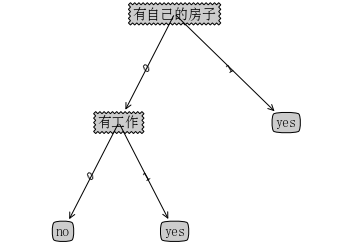

In [5]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

def getNumLeafs(myTree):
    numLeafs=0
    firstStr=next(iter(myTree))
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else: numLeafs+=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0                                                #初始化决策树深度
    firstStr = next(iter(myTree))                                #python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]                                #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth            #更新层数
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                            #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',    #绘制结点
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                                            #计算标注位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                        #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                            #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                          #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                            #获取决策树层数
    firstStr = next(iter(myTree))                                                            #下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                    #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                        #绘制结点
    secondDict = myTree[firstStr]                                                            #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                        #y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                                            #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                        #不是叶结点，递归调用继续绘制
        else:                                                                                #如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')#创建fig
    fig.clf()#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0#x偏移
    plotTree(inTree, (0.5,1.0), '')#绘制决策树
    plt.show()#显示绘制结果

if __name__ == '__main__':
    dataSet, labels = creatDataSet()
    featLabels = []
    myTree = createTree(dataSet, labels, featLabels)
    print(myTree)
    createPlot(myTree)

In [7]:
def classify(inputTree,featLabels,testVec):
    #获取决策树节点
    firstStr=next(iter(inputTree))
    #下一个字典
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)

    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classLabel=classify(secondDict[key],featLabels,testVec)
            else: classLabel=secondDict[key]
    return classLabel

if __name__=='__main__':
    dataSet,labels=creatDataSet()
    featLabels=[]
    myTree=createTree(dataSet,labels,featLabels)
    #测试数据
    testVec=[0,1]
    result=classify(myTree,featLabels,testVec)

    if result=='yes':
        print('放贷')
    if result=='no':
        print('不放贷')

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
放贷
